# Badanie kodowania różnicowego

Należy sporządzić wykresy będące histogramem średnich z obrazka (np. lenna). Oraz histogramy kodów różnicowych

- zwykłego
- medianowego
- adaptacyjnego

## Test dla jednego obrazka

In [2]:
from PIL import Image

from vector_quantization.metrics import PSNR
from vector_quantization.image import load_image, save_image
from vector_quantization.codebooks import random_codebook
from vector_quantization.vectorize import vectorize, image_from_vectors
from vector_quantization.lbg import lbg
from vector_quantization.mean_removal_quantization import mean_removal_quantize
from vector_quantization.mean_removal_quantization import mean_removal_quantize_from_codebook
from vector_quantization.differential_encoding import *

import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
import sys
sys.path.append(os.path.realpath('..'))
img = load_image("lennagrey.bmp", "../img/input/")

In [4]:
# Performing quantization with removed means (MRVQ)
window_size = 4
vectors = vectorize(img, window_size=window_size)
means = np.mean(vectors, axis=1, keepdims=True)  # mean should be in shape like smaller image.
height, width = img.shape
means_reshaped = means.reshape((height // window_size, width // window_size))

In [5]:
# Differential encoding means from MRVQ
encoded = differential_encoding(means_reshaped)

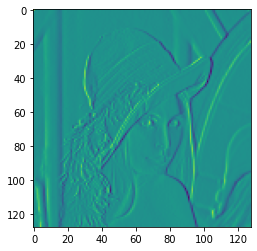

In [6]:
# Show encoded image
plt.imshow(encoded)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


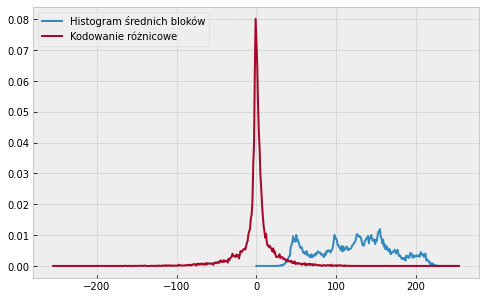

In [7]:
# Make histograms with probability
plt.figure(figsize=(8, 5))
hist_means, bins_means = np.histogram(means, bins=np.arange(256))
hist_means = hist_means / np.sum(hist_means)
hist_encoded, bins_encoded = np.histogram(encoded.ravel(), bins=np.arange(-255, 256))
hist_encoded = hist_encoded / np.sum(hist_encoded)
plt.style.use('bmh')
plt.plot(bins_means[:-1], hist_means, label="Histogram średnich bloków")
plt.plot(bins_encoded[:-1], hist_encoded, label="Kodowanie różnicowe")
plt.legend(loc='upper left')
plt.savefig('differential_encoding_histogram_image.eps')
plt.show()

In [8]:
# Calculate entropy
from scipy.stats import entropy

entropy_means = entropy(hist_means, base=2)
entropy_encoded = entropy(hist_encoded, base=2)
print(f"Entropia średnie = {entropy_means}, entropia kodowanie różnicowe = {entropy_encoded}")

Entropia średnie = 7.391431320626797, entropia kodowanie różnicowe = 5.813836974408533


## Porównanie histogramów zaimplementowanych metod

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


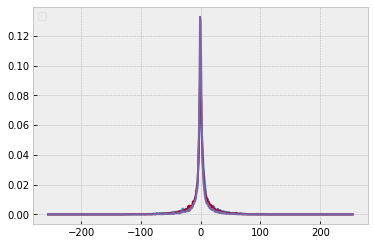

In [11]:
encoders = [differential_encoding, differential_median_encoding, median_adaptive_predictor_encoding]
# names = ['Kodowanie różnicowe', 'Kodowanie średnimi', "Adaptacyjny"]
plt.style.use('bmh')
plt.figure()

for idx, encoder in enumerate(encoders):
    encoded = encoder(means_reshaped)
    hist_encoded, bins_encoded = np.histogram(encoded.ravel(), bins=np.arange(-255, 256))
    hist_encoded = hist_encoded / np.sum(hist_encoded)
    plt.plot(bins_encoded[:-1], hist_encoded)
    
plt.legend(loc='upper left')
plt.savefig('differential_encoding_histograms_comparison.eps')
plt.show()

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


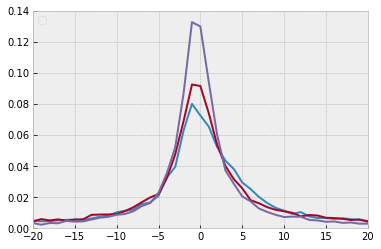

In [12]:
plt.style.use('bmh')

encoders = [differential_encoding, differential_median_encoding, median_adaptive_predictor_encoding]
# names = ['Kodowanie różnicowe', 'Medianowe DE', "MAD"]
plt.figure()

for idx, encoder in enumerate(encoders):
    encoded = encoder(means_reshaped)
    hist_encoded, bins_encoded = np.histogram(encoded.ravel(), bins=np.arange(-255, 256))
    hist_encoded = hist_encoded / np.sum(hist_encoded)
    plt.plot(bins_encoded[:-1], hist_encoded)

plt.xlim(-20, 20)
plt.ylim(0, 0.14)
plt.legend(loc='upper left')
plt.savefig('differential_encoding_histograms_comparison_zoom.eps')
plt.show()

## Wsadowe porównanie entropii

In [13]:
filenames = os.listdir("../img/input/")

data = {'name': [], 'means': [], 'de': [], 'mde': [], 'mad': []}
from scipy.stats import entropy

encoders = [differential_encoding, differential_median_encoding, median_adaptive_predictor_encoding]
names = ['de', 'mde', "mad"]

for filename in filenames:
    print(filename)
    img = load_image(filename, "../img/input/")
    data['name'].append(filename)
    window_size = 4
    vectors = vectorize(img, window_size=window_size)
    means = np.mean(vectors, axis=1, keepdims=True)  # mean should be in shape like smaller image.
    height, width = img.shape
    means_reshaped = means.reshape((height // window_size, width // window_size))
    
    hist_means, bins_means = np.histogram(means, bins=np.arange(256))
    hist_means = hist_means / np.sum(hist_means)
    entropy_means = entropy(hist_means, base=2)
    data['means'].append(entropy_means)

    for idx, encoder in enumerate(encoders):
        encoded = encoder(means_reshaped)
        hist_encoded, bins_encoded = np.histogram(encoded.ravel(), bins=np.arange(-255, 256))
        hist_encoded = hist_encoded / np.sum(hist_encoded)
        entropy_encoded = entropy(hist_encoded, base=2)
        data[names[idx]].append(entropy_encoded)

Aerial.bmp
airfield.bmp
airplane.bmp
baboonTMW.bmp
balloon.bmp
balloon_noise.bmp
BARB.bmp
BARB2.bmp
barb512.bmp
BOARD.bmp
boat512.bmp
boats.bmp
bridge.bmp
bridge256.bmp
camera256.bmp
couple.bmp
couple256.bmp
crowd512.bmp
EARTH.bmp
elaine.bmp
ELIF.bmp
finger.bmp
FROG512.BMP
GIRL.bmp
GOLD.bmp
GOLDHILL.BMP
harbour512.bmp
HOTEL.bmp
lax512.bmp
lenaTMW.bmp
lennagrey.bmp
man512.bmp
noisesquare.bmp
OMAHA.bmp
peppersTMW.bmp
SAILBOAT.bmp
seismic.bmp
SENA.bmp
SENSIN.bmp
shapes.bmp
SINAN.bmp
Tank512.bmp
Truck512.bmp
woman1.bmp
woman2.bmp
ZELDA.bmp


In [47]:
import pandas as pd
df = pd.DataFrame(data=data)

In [48]:
df

,name,means,de,mde,mad
0,Aerial.bmp,6.799397,6.370003,6.346111,6.281835
1,airfield.bmp,7.600676,6.335829,6.200263,6.115437
2,airplane.bmp,6.725235,5.192151,5.384822,4.951908
3,baboonTMW.bmp,7.133698,6.231330,6.065259,6.049762
4,balloon.bmp,7.305988,4.676627,4.567023,3.750564
5,balloon_noise.bmp,7.312372,4.684539,4.569674,3.760032
6,BARB.bmp,7.460040,6.003715,5.863538,5.321274
7,BARB2.bmp,7.389961,5.914602,5.700214,5.371247
8,barb512.bmp,7.551742,5.994919,5.846057,5.308187
9,BOARD.bmp,6.751369,4.478934,4.893147,3.820169


In [49]:
df.to_csv('differential_encoding_means.csv')

In [50]:
df.describe()

In [1]:
import pandas as pd
df = pd.read_csv('differential_encoding_means.csv')

## Tabela z entropią

In [10]:
print(df.loc[:, 'name':'mad'].to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
              name &     means &        de &       mde &       mad \\
\midrule
        Aerial.bmp &  6.799397 &  6.370003 &  6.346111 &  6.281835 \\
      airfield.bmp &  7.600676 &  6.335829 &  6.200263 &  6.115437 \\
      airplane.bmp &  6.725235 &  5.192151 &  5.384822 &  4.951908 \\
     baboonTMW.bmp &  7.133698 &  6.231330 &  6.065259 &  6.049762 \\
       balloon.bmp &  7.305988 &  4.676627 &  4.567023 &  3.750564 \\
 balloon\_noise.bmp &  7.312372 &  4.684539 &  4.569674 &  3.760032 \\
          BARB.bmp &  7.460040 &  6.003715 &  5.863538 &  5.321274 \\
         BARB2.bmp &  7.389961 &  5.914602 &  5.700214 &  5.371247 \\
       barb512.bmp &  7.551742 &  5.994919 &  5.846057 &  5.308187 \\
         BOARD.bmp &  6.751369 &  4.478934 &  4.893147 &  3.820169 \\
       boat512.bmp &  7.105094 &  5.628897 &  5.799380 &  5.270987 \\
         boats.bmp &  7.039440 &  5.171864 &  5.334069 &  4.660202 \\
        bridge.bmp &  7.612662 &  6.195047 &  6.

In [12]:
df.describe()

,Unnamed: 0,means,de,mde,mad
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,22.500000,6.975929,5.524930,5.542701,5.071648
std,13.422618,0.693522,0.694665,0.572985,0.758684
min,0.000000,4.114868,3.784849,3.874582,3.495424
25%,11.250000,6.763376,5.143829,5.212344,4.626868
50%,22.500000,7.222884,5.654124,5.556237,5.106929
75%,33.750000,7.403710,5.947181,5.836281,5.441747
max,45.000000,7.612662,7.141744,6.895302,6.848980
